In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
journal = 'PRE'

In [3]:
def read_list_from_file(filename):
    data_list = []
    with open("./"+journal+"/data/" + filename, 'r') as file:
        for line in file:
            data_list.append(int(line.strip()))
    return data_list

In [4]:
t_ends = read_list_from_file('t_ends')
t_ends = [sum(t_ends[0:i]) for i in list(range(1,len(t_ends)+1))]
t_ends = [t_ends[i] + i for i in list(range(len(t_ends)))]

In [5]:
t_begins = [0]+[i+1 for i in t_ends]

In [6]:
def set_plotting_style():
    plt.rcParams['lines.linewidth'] = 2
    plt.rcParams['lines.markeredgewidth'] = 2
    plt.rcParams['lines.markersize'] = 10
    plt.rcParams['axes.linewidth'] = 2
    plt.rcParams['font.size'] = 20
    plt.rcParams['legend.fontsize'] = 20 * 0.6
    plt.rcParams['figure.subplot.left'] = 0.075
    plt.rcParams['figure.subplot.right'] = 0.925
    plt.rcParams['figure.subplot.bottom'] = 0.4
    plt.rcParams['figure.subplot.top'] = 0.8
    plt.rcParams['xtick.bottom'] = True
    plt.rcParams['xtick.top'] = True
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['xtick.minor.size'] = 4
    plt.rcParams['xtick.minor.width'] = 2
    plt.rcParams['xtick.major.size'] = 8
    plt.rcParams['xtick.major.width'] = 2
    plt.rcParams['ytick.left'] = True
    plt.rcParams['ytick.right'] = True
    plt.rcParams['ytick.direction'] = 'in'
    plt.rcParams['ytick.minor.size'] = 4
    plt.rcParams['ytick.minor.width'] = 2
    plt.rcParams['ytick.major.size'] = 8
    plt.rcParams['ytick.major.width'] = 2

set_plotting_style()

In [7]:
# journal = 'PRD'

import math

se_differences = []

for snapshot in range(1, len(t_ends)+1):

    data = pd.read_csv('./'+journal+'/data/snapshot'+str(snapshot)+'.csv', index_col = 0)
    se_difference = (list(data.susceptibility_3m).index(max(data.susceptibility_3m)) - list(data.error_ratio_3m).index(max(list(data.error_ratio_3m.fillna(0)))))
    se_differences.append(se_difference)

print(f'Median of se_differences: {np.median(se_differences)}')

Median of se_differences: -1.0


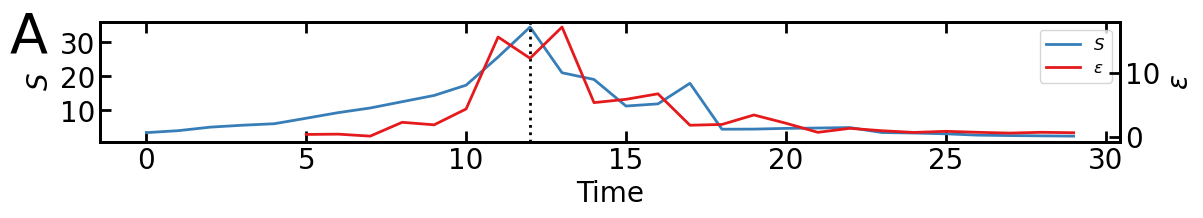

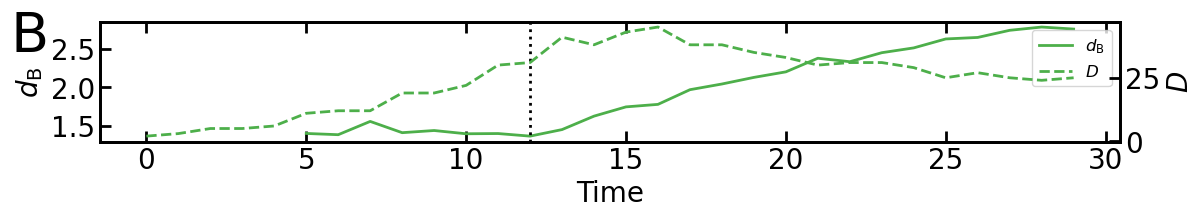

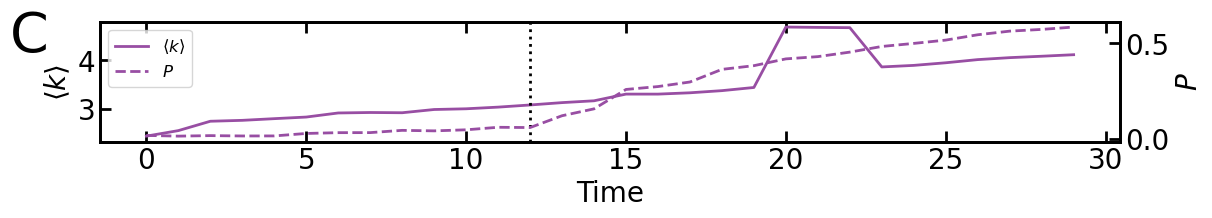

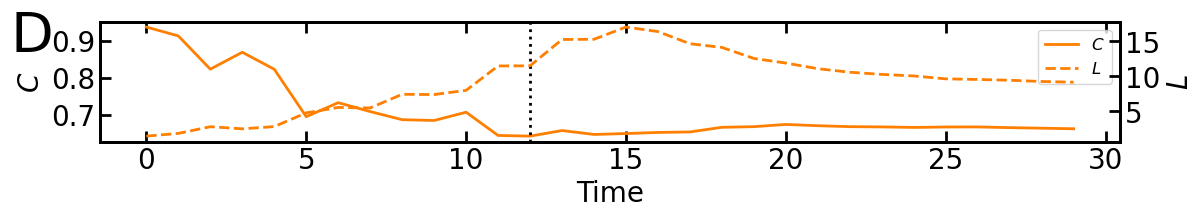

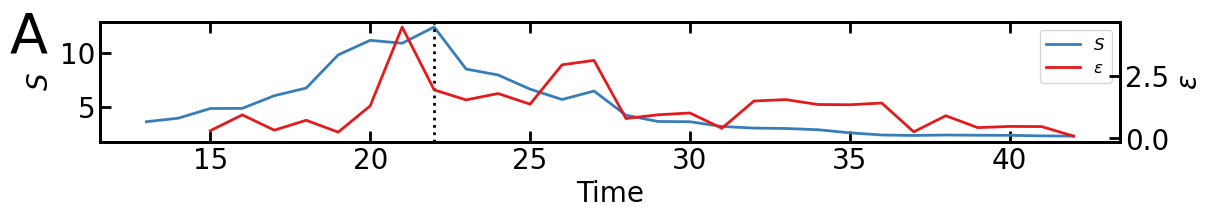

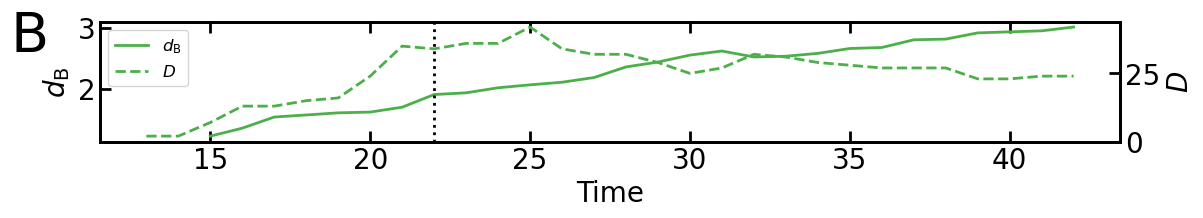

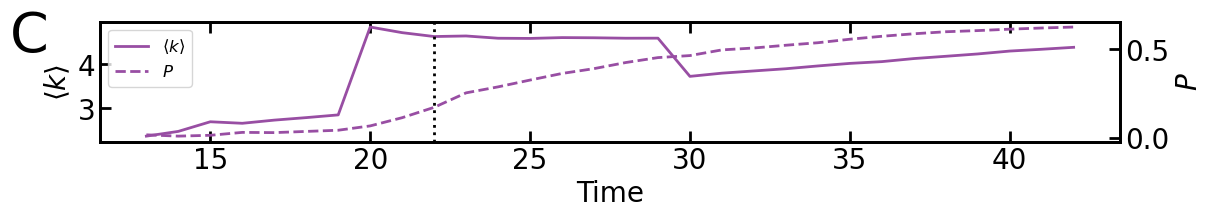

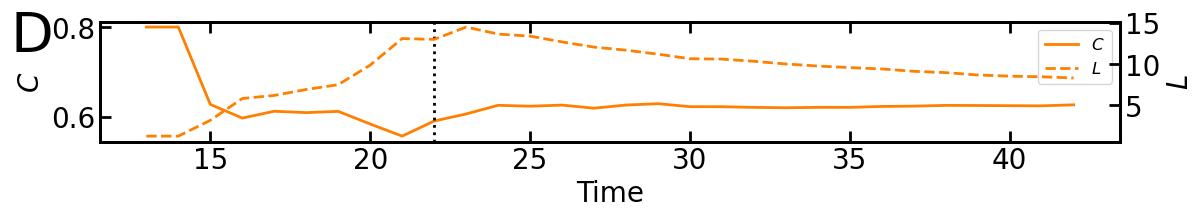

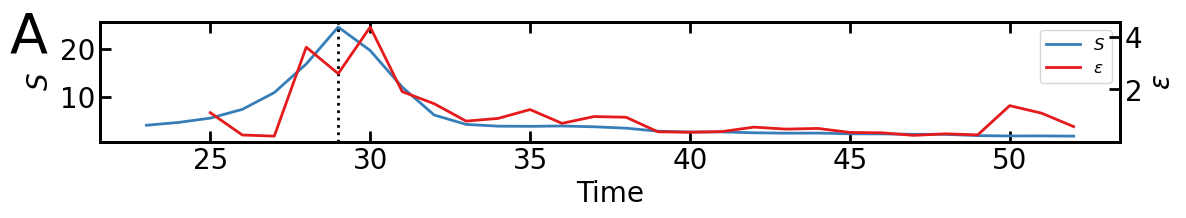

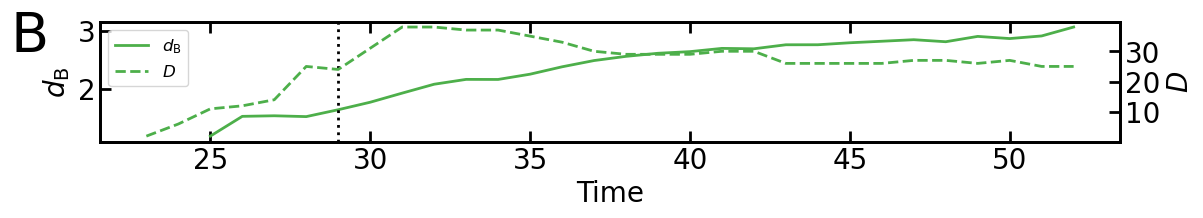

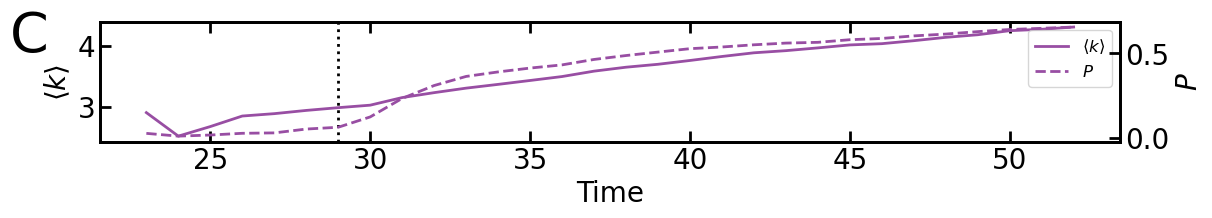

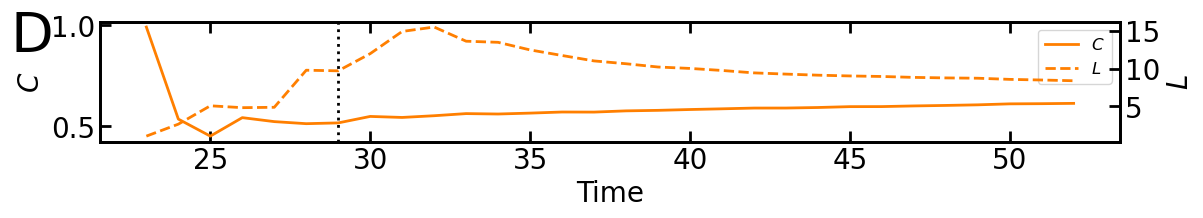

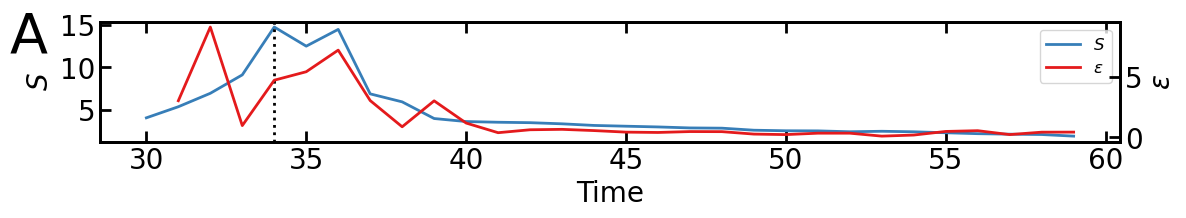

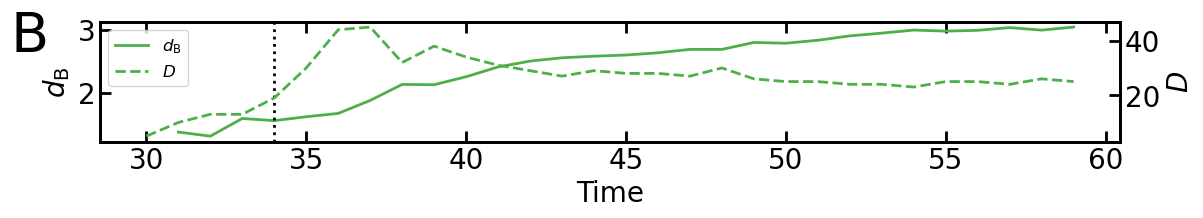

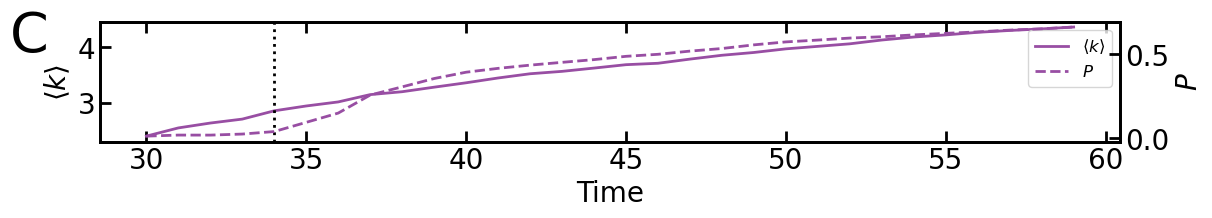

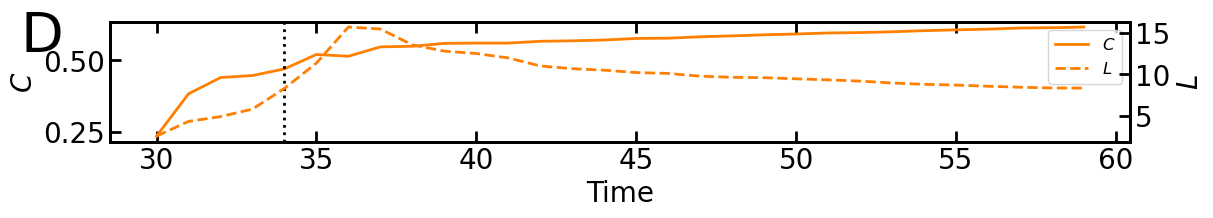

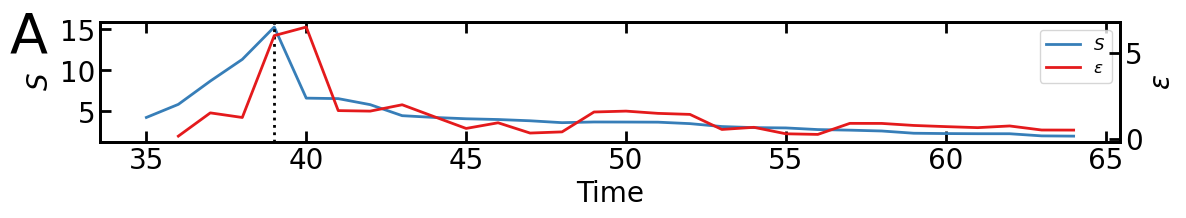

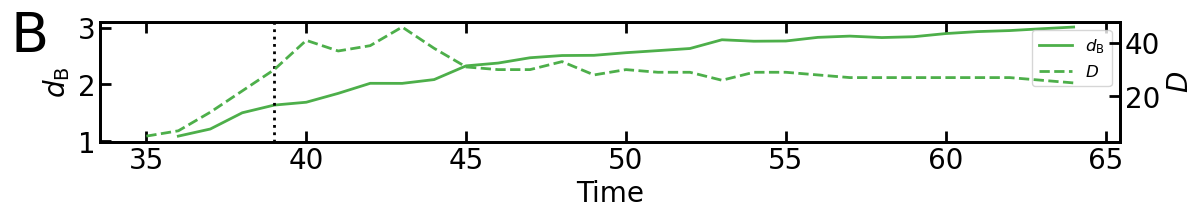

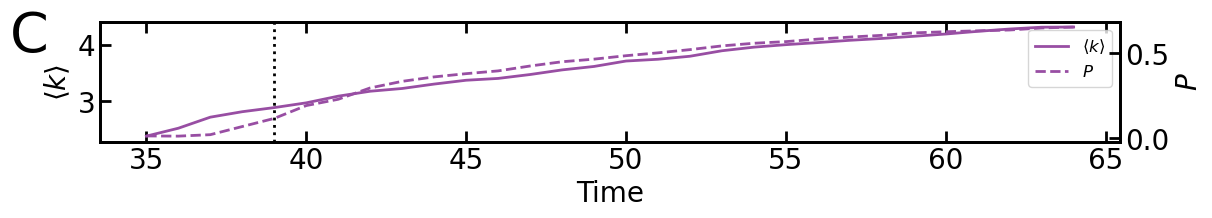

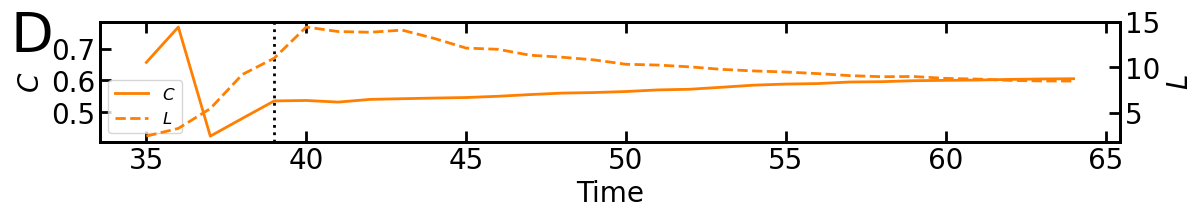

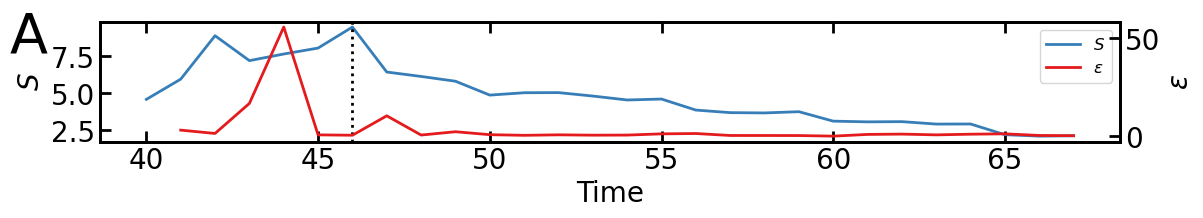

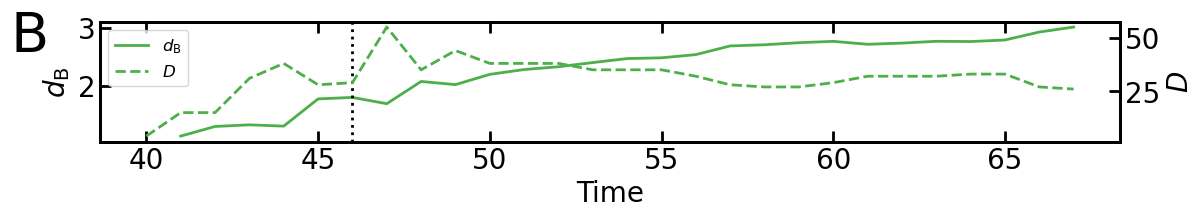

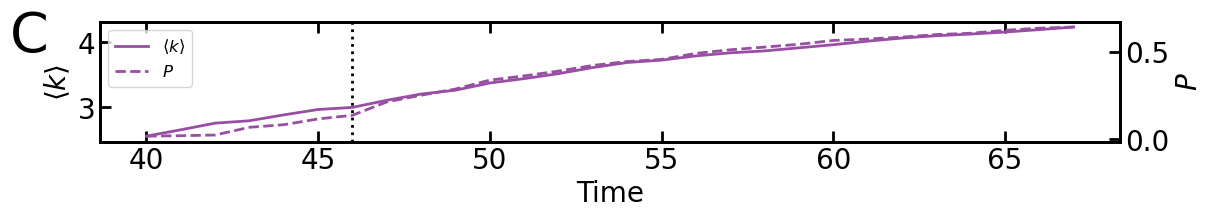

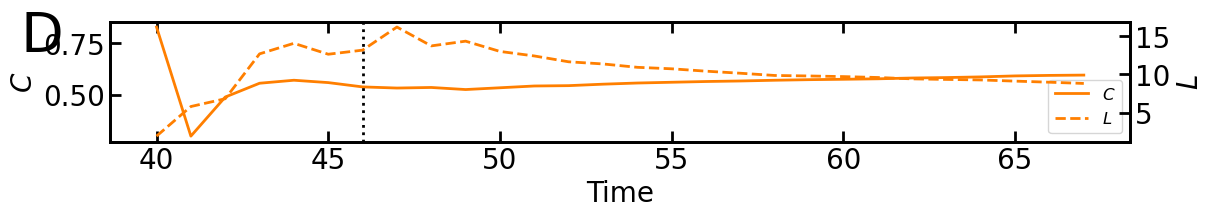

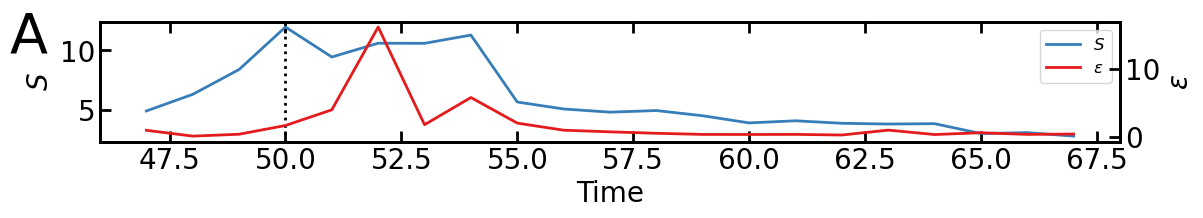

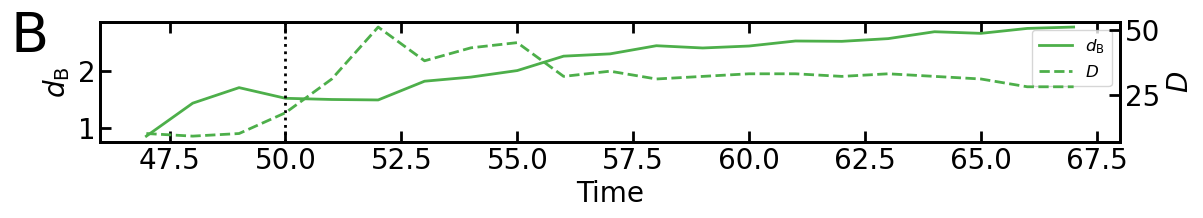

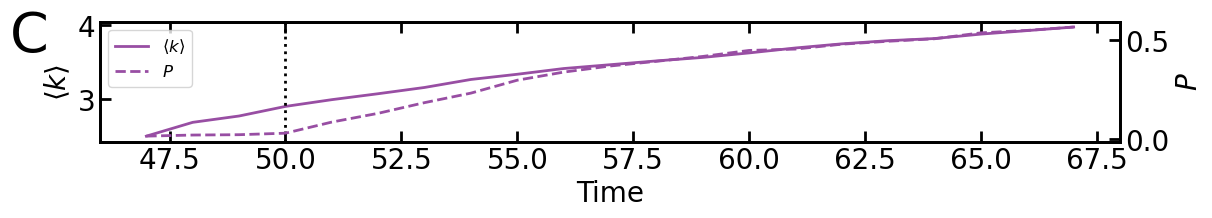

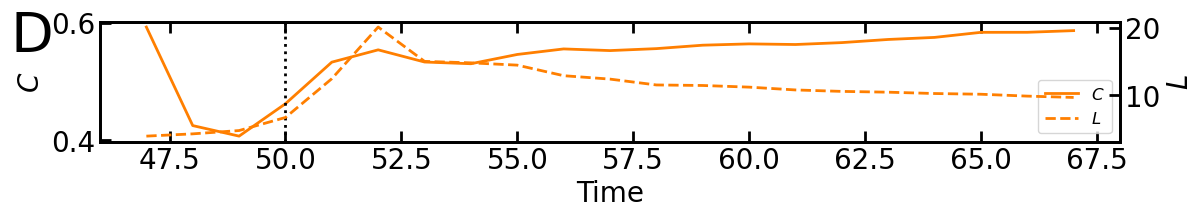

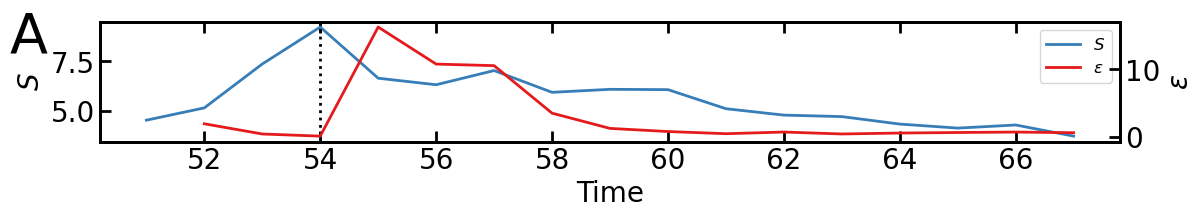

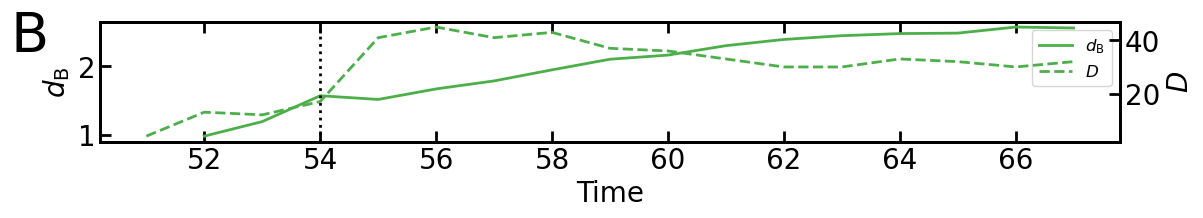

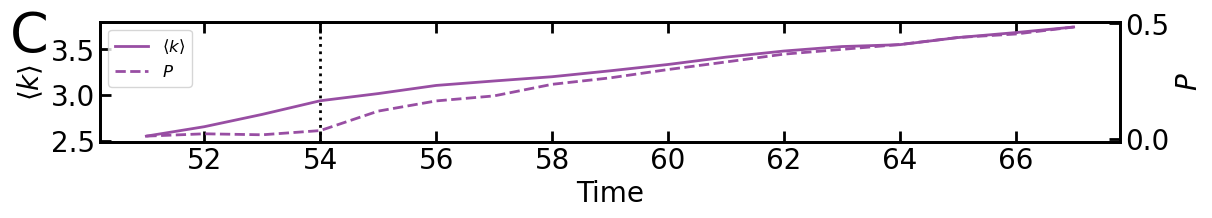

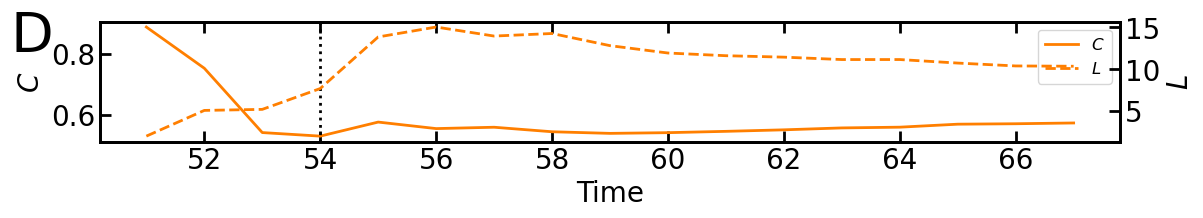

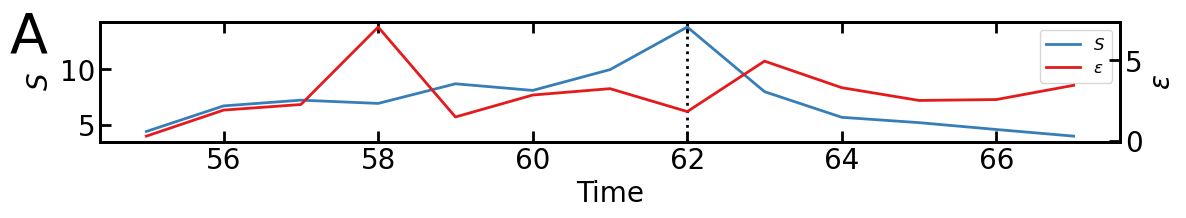

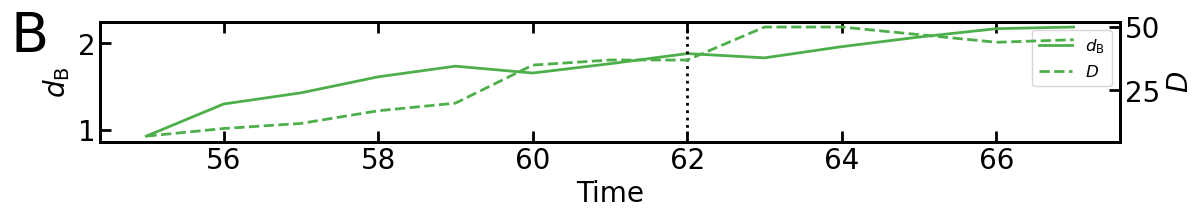

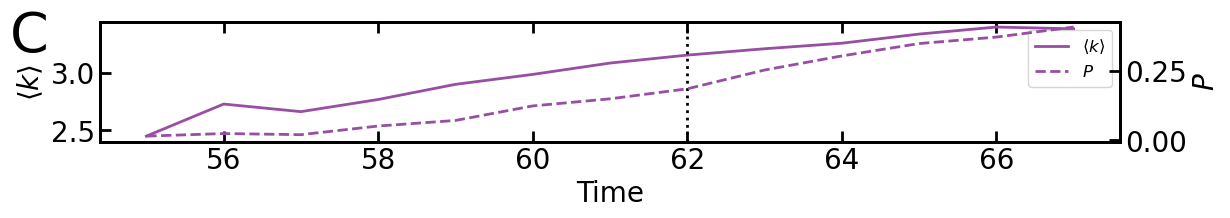

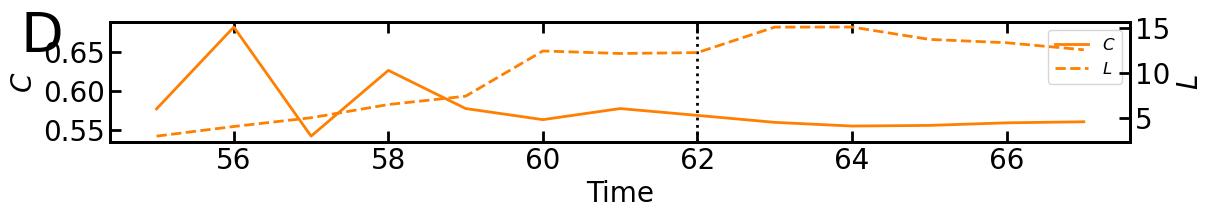

In [8]:
for snapshot in range(1, len(t_ends)+1):

    t_end = t_ends[snapshot-1]
    t_begin = t_begins[snapshot-1]
    data = pd.read_csv('./'+journal+'/data/snapshot'+str(snapshot)+'.csv', index_col = 0)
    
    
    # error ratio and susceptibility
    fig, ax1 = plt.subplots(figsize=(12, 3))
    ax2 = ax1.twinx()
    plot_s = ax1.plot(range(t_begin, t_begin + len(data.susceptibility_3m)), data.susceptibility_3m, color=plt.cm.Set1(1), label='$S$')
    plot_e = ax2.plot(range(t_begin, t_begin + len(data.error_ratio_3m)), data.error_ratio_3m, color=plt.cm.Set1(0),label='$\epsilon$')
    ax1.axvline(t_end, ls=':', color='black')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('$S$')
    ax2.set_ylabel('$\epsilon$')
    plots = plot_s + plot_e
    labels = [plot.get_label() for plot in plots]
    ax1.legend(plots, labels)
    plt.gcf().text(0., 0.7, 'A', fontsize=40)
    plt.savefig('./'+journal+'/figures/'+journal+'_'+str(snapshot)+'_A.pdf')
    plt.show()

    
    # fractal dimension and network diameter
    color = 2
    fig, ax1 = plt.subplots(figsize=(12, 3))
    ax2 = ax1.twinx()
    plot_db = ax1.plot(range(t_begin, t_begin + len(data.fractal_dimension_3m)), data.fractal_dimension_3m, color=plt.cm.Set1(color), label='$d_\mathrm{B}$')
    plot_d = ax2.plot(range(t_begin, t_begin + len(data.net_diameter_m3)), data.net_diameter_m3, color=plt.cm.Set1(color), ls='--', label='$D$')
    ax1.axvline(t_end, ls=':', color='black')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('$d_\mathrm{B}$')
    ax2.set_ylabel('$D$')
    plots = plot_db + plot_d
    labels = [plot.get_label() for plot in plots]
    ax1.legend(plots, labels)
    plt.gcf().text(0., 0.7, 'B', fontsize=40)
    plt.savefig('./'+journal+'/figures/'+journal+'_'+str(snapshot)+'_B.pdf')
    plt.show()

    
    # average degree and percolation probability
    color = 3
    fig, ax1 = plt.subplots(figsize=(12, 3))
    ax2 = ax1.twinx()
    plot_k = ax1.plot(range(t_begin, t_begin + len(data.avg_degree_3m)), data.avg_degree_3m, color=plt.cm.Set1(color), label='$\\langle k\\rangle$')
    plot_p = ax2.plot(range(t_begin, t_begin + len(data.percolation_3m)), data.percolation_3m, color=plt.cm.Set1(color), ls='--', label='$P$')
    ax1.axvline(t_end, ls=':', color='black')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('$\\langle k\\rangle$')
    ax2.set_ylabel('$P$')
    plots = plot_k + plot_p
    labels = [plot.get_label() for plot in plots]
    ax1.legend(plots, labels)
    plt.gcf().text(0., 0.7, 'C', fontsize=40)
    plt.savefig('./'+journal+'/figures/'+journal+'_'+str(snapshot)+'_C.pdf')
    plt.show()

    
    # average clustering coefficient and average shortest path length
    color = 4
    fig, ax1 = plt.subplots(figsize=(12, 3))
    ax2 = ax1.twinx()
    plot_c = ax1.plot(range(t_begin, t_begin + len(data.avg_clus_coef_m3)), data.avg_clus_coef_m3, color=plt.cm.Set1(color), label='$C$')
    plot_l = ax2.plot(range(t_begin, t_begin + len(data.avg_shortest_path_len_m3)), data.avg_shortest_path_len_m3, color=plt.cm.Set1(color), ls='--', label='$L$')
    ax1.axvline(t_end, ls=':', color='black')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('$C$')
    ax2.set_ylabel('$L$')
    plots = plot_c + plot_l
    labels = [plot.get_label() for plot in plots]
    ax1.legend(plots, labels)
    plt.gcf().text(0., 0.7, 'D', fontsize=40)
    plt.savefig('./'+journal+'/figures/'+journal+'_'+str(snapshot)+'_D.pdf')
    plt.show()

    
    #color = 6
    #fig, ax = plt.subplots(figsize=(12, 3))
    #plot_x = ax.plot(range(t_begin, t_begin + len(data.corrlength_3m)), data.corrlength_3m, color=plt.cm.Set1(color), label='$\\xi$')
    #ax.axvline(t_end, ls=':', color='black')
    #ax.set_xlabel('Time')
    #ax.set_ylabel('$\\xi$')
    #plt.gcf().text(0., 0.7, 'E', fontsize=40)
    #plt.savefig('./'+journal+'/figures/'+journal+'_'+str(snapshot)+'_E.pdf')
    #plt.show()